# Mega Cheatsheet for Python
#### A summary of useful functions from the various Python libraries used for data processing and analysis.

1. NumPy

In [ ]:
import numpy as np

## 1.1 Basic functions
a = np.array(([1,2,3], 
             [4,5,6],
             [7,8,9]))
b = np.arange(10, 25, 5) # start, stop, step
c = np.linspace(0, 2, 9) # start, stop, number of points
d = np.random.random(5)

e = np.eye(5) # 5x5 identity matrix
f = np.zeros(8)
g = np.random.rand(3, 3) # 3x3 random matrix

In [ ]:
## 1.2 Linear algebra operations
np.sqrt(a)
np.log(a)
np.exp(a)

a.dot(g) # dot product
np.transpose(a)

a.ravel() # flatten to 1D
f.reshape(4, 2) # reshape to 4x2
e.resize(5, 5) # flattens then reshapes

np.c_[a, g] # reshapes for you!!
np.append(a, g, axis = 1) # joining arrays, MUST HAVE SAME DIM ALONG AXIS
np.vstack((a, g))
np.hstack((a, g))

np.hsplit(a, (2,1))
np.vsplit(a, (2,1))

[array([[1, 2, 3],
        [4, 5, 6]]),
 array([], shape=(0, 3), dtype=int64),
 array([[4, 5, 6],
        [7, 8, 9]])]

In [11]:
## 1.3 Inspecting array
a.shape
a.ndim
a.size
a.dtype

a[1, 2] 
a[: , 1] # all the rows, only col 1
a[[1, 0, 1, 2], [0, 1, 0, 2]] # elems at positions (1,0), (0,1) etc.

a == g # elem wise comparison
np.array_equal(a, b) # array wise comparison

False

2. Pandas

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                    columns = iris['feature_names'] + ['target'])

my_data = ["A", "A", "C", "B", "C", "A"]
my_series2 = pd.Categorical(my_data, categories=["C", "B", "A"], ordered=True) # creating categorical ordered series


In [ ]:
## 2.1 DataFrame maniupulation

pd.read_csv('xyz.csv')
pd.read_csv("adult.csv", dtype = {"Workclass": "category", "Education": "category"}) # with specification of dtypes
pd.read_excel('xyz.xls', 'Sheet1')

iris['petal length (cm)'] = iris['petal length (cm)'].astype('float') # type coercion
pd.to_datetime(df)

iris.sort_values('petal length (cm)', ascending = True) # sort by values
iris.sort_index(ascending = False) # sort by index ; not useful here
iris.reset_index(drop = True, inplace = True) # reset index to number, drop index col

iris.rename(columns = {'petal length (cm)': 'petal length (inch)'})

iris.drop('petal length (cm)', axis = 1) # drop col/row
iris.dropna()
iris.fillna(1)

In [ ]:
## 2.2 Pivot wide and long

df.pivot(index = 'col1', columns = 'col2', values = ['col3', 'col4']) # take the values of: col1 as index, col2 as column names, remain as values

### e.g.
df_long = pd.DataFrame({'id': [1, 1, 2, 2],
                        'subject': ['math', 'science', 'math', 'science'],
                        'score': [90, 85, 80, 95]
                        })

df_long.pivot(index='id', columns='subject', values='score').reset_index()

### e.g.
df = pd.DataFrame({
    'id': [1, 2],
    'math': [90, 80],
    'science': [85, 95]
})

# Melt it
pd.melt(df, id_vars='id', var_name='subject', value_name='score')

In [ ]:
## 2.3 Retrieving values & slicing

iris.columns # all col labels
iris.values # all values
iris.iloc[58, 2] == iris.loc[58, 'petal length (cm)'] # retriving values

iris.loc[iris['petal length (cm)'] <= 2]
iris.loc[:, 'sepal length (cm)':'sepal width (cm)'] 

iris.loc[iris['petal length (cm)'] <= 2, ['sepal length (cm)', 'sepal width (cm)']] # using conditions, bottom line is to have (row, col)

iris[iris['petal length (cm)'] <= 2]
iris[['sepal length (cm)', 'sepal width (cm)']]

iris.iat[1, 2]

np.float64(1.4)

In [ ]:
## 2.4 Summarizing data

iris.shape
iris.size()
iris.info()
iris.describe() # description and stats for each col eg. iqr
iris['petal length (cm)'].describe() # description for a single col

iris.sample(5)
iris.nlargest(2, 'petal length (cm)') # get the max/min directly

iris['target'].value_counts() # count number of rows for a variable
iris['target'].value_counts(normalize = True) # relative freq for a variable
iris['target'].nunique()

### 2.4.1 groupby and agg
iris.groupby(by = ['petal length (cm)', 'pedal width (cm)'])['sepal width (cm)'].mean() # note we need to specify which col to agg on still

unemployment[["continent", "2019", "2020"]].groupby('continent').agg(['mean', 'std']) # groupby then summarise with agg functions
continent_summary = unemployment.groupby("continent").agg(mean_rate_2021 = ("2021", "mean"), std_rate_2021 = ("2021", "std"))
                                                        # name of summary col = (col to use, func to use)

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

In [ ]:
## 2.5 Joining data frames
pd.concat([df1, df2], axis = 0, ignore_index = True)
pd.merge(df1, df2, how = 'left', on = 'A') # other joining methods also avail

In [2]:
# 2.6 pd.Series.cat
s = pd.Series(list("abbccc")).astype("category")

s.cat.categories # print categories (of a specific col if specified)

s.cat.reorder_categories(['b', 'c', 'a'], ordered=True) # reorder categories
s.cat.add_categories(['d', 'e'], inplace=True) # add categories
s.cat.remove_unused_categories(inplace=True) # remove unused categories

s.cat.rename_categories({'c': 'charlie', 'b': 'bravo', 'a': 'alpha'})
s.cat.rename_categories(lambda x: x.upper())

s.replace({'c': 'bravo', 'b': 'bravo'}) # collapse categories
s.astype('category') # change to category type after collapsing

NameError: name 'pd' is not defined

In [ ]:
# categorical variable encoding 
s.cat.codes # change categories to codes, assign to a new col if required 

codes = used_cars['color_code']
categories = used_cars["color"]
color_map = dict(zip(codes, categories)) # zip() makes tuples of (code, category)

used_cars["is_volkswagen"] = np.where(
  used_cars["manufacturer_name"].str.contains("Volkswagen", regex=False), 1, 0) # create a new column based on if name contains "Volkswagen"

### one hot encoding
pd.get_dummies(used_cars["manufacturer_name"], prefix="manufacturer") # one hot encoding for categorical variable, meaning make cols for each category with 1s and 0s

In [ ]:
# 2.7 pd.Series.str for data cleaning!
s = pd.Series(['a', 'b', 'c'])
s.str.lower() # also upper(), title()
s.str.strip() # remove leading and trailing spaces

s.str.contains('a') # check if contains a string

s.str.replace('a', 'A') # replace a string with another
s.str.split('a') # split by a string


3. Matplotlib

In [ ]:
import matplotlib.pyplot as plt

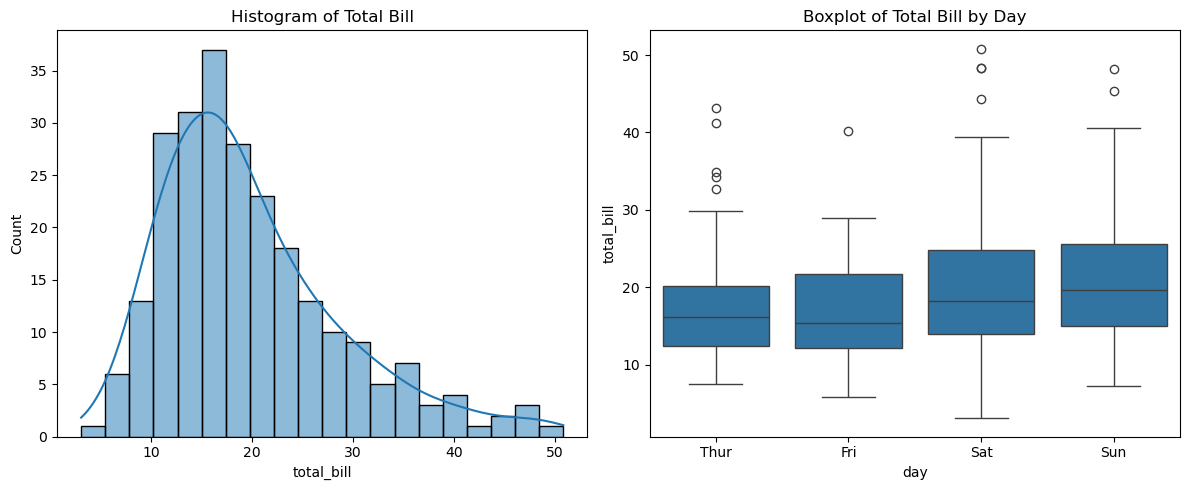

In [1]:
# E.g. of plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Load Seaborn built-in dataset
tips = sns.load_dataset("tips")

# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of total bill on the first axis
sns.histplot(data=tips, x="total_bill", bins=20, kde=True, ax=ax[0])
ax[0].set_title("Histogram of Total Bill")

# Boxplot of total bill by day on the second axis
sns.boxplot(data=tips, x="day", y="total_bill", ax=ax[1])
ax[1].set_title("Boxplot of Total Bill by Day")

# Adjust layout
plt.tight_layout()
plt.show()
